In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import datetime

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#%matplotlib notebook 

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        if len(cities) < 501: # if len(cities) < 5 for test 429 error code
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

300

In [4]:
#define variables
base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key 
record_counter = 0
set_counter = 1

#define objects
country = []
lat = []
lng = [] 
date = [] 
cloudiness = [] 
humidity = []
max_temp = [] 
wind = []
 
print(f"Beginning Data Retrieval \n-----------------------------") 

for city in cities:
    query_url = base_url + "&q=maraa" #+ city
    resp_data = requests.get(query_url).json() #request weather data   

    if record_counter < 50:
        record_counter += 1
    else:
        record_counter = 0 
        set_counter += 1  
        
    print('Processing Record {} of Set {} | {}'.format(record_counter, set_counter, city)) 
    
    try: 
        country.append(resp_data['sys']['country'])
        lat.append(resp_data['coord']['lat'])
        lng.append(resp_data['coord']['lon'])
        date.append(datetime.date.fromtimestamp(resp_data['dt'])) #convert timestamp     
        cloudiness.append(resp_data['clouds']['all'])
        humidity.append(resp_data['main']['humidity'])
        max_temp.append(resp_data['main']['temp_max']) 
        wind.append(resp_data['wind']['speed']) 
    except:
        print("404 City Not Found!")
        pass
    

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | viljoenskroon
Processing Record 5 of Set 1 | tecoanapa
Processing Record 6 of Set 1 | palmital
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | taolanaro
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | mukhen
Processing Record 12 of Set 1 | tsihombe
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | englehart
Processing Record 16 of Set 1 | naryan-mar
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | itoman
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | coahuayana
Processing Record 23 of Set 1 | ushu

Processing Record 45 of Set 4 | tocopilla
Processing Record 46 of Set 4 | cooma
Processing Record 47 of Set 4 | annau
Processing Record 48 of Set 4 | porto santo
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 0 of Set 5 | adrar
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | iskele
Processing Record 3 of Set 5 | saint anthony
Processing Record 4 of Set 5 | moranbah
Processing Record 5 of Set 5 | illoqqortoormiut
Processing Record 6 of Set 5 | kargopol
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | kloulklubed
Processing Record 9 of Set 5 | santa rosa
Processing Record 10 of Set 5 | mundi
Processing Record 11 of Set 5 | hasaki
Processing Record 12 of Set 5 | ertil
Processing Record 13 of Set 5 | suntar
Processing Record 14 of Set 5 | iqaluit
Processing Record 15 of Set 5 | moussoro
Processing Record 16 of Set 5 | burriana
Processing Record 17 of Set 5 | karlskrona
Processing Record 18 of Set 5 | 

### Convert Raw Data to DataFrame

In [6]:
weather = { "City": cities, "Country": country, "Latitude": lat, "Longitude": lng, 
            "Date": date, "Cloudiness": cloudiness, "Humidity": humidity, "MaxTemp": max_temp, "WindSpeed": wind }
 
weather_df = pd.DataFrame(weather)
weather_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,MaxTemp,WindSpeed
0,barrow,BR,-1.8333,-65.3667,2021-02-05,100,98,296.57,1.82
1,albany,BR,-1.8333,-65.3667,2021-02-05,100,98,296.57,1.82
2,butaritari,BR,-1.8333,-65.3667,2021-02-05,100,98,296.57,1.82
3,viljoenskroon,BR,-1.8333,-65.3667,2021-02-05,100,98,296.57,1.82
4,tecoanapa,BR,-1.8333,-65.3667,2021-02-05,100,98,296.57,1.82


In [7]:
#export city data frame into csv
weather_df.to_csv("../Output/cities.csv", encoding = "UTF-8", index = False, header = True) 

In [13]:
# Inspect the data and remove the cities where the humidity > 100%.
humidity_df = weather_df['Humidity'].describe()
humidity_df

count    300.0
mean      98.0
std        0.0
min       98.0
25%       98.0
50%       98.0
75%       98.0
max       98.0
Name: Humidity, dtype: float64

In [14]:
#  Get the indices of cities that have humidity over 100%.


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data

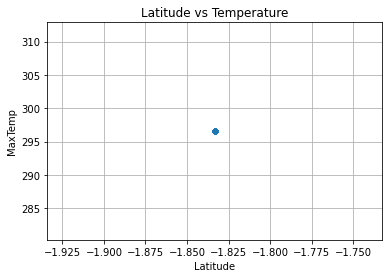

In [16]:
#Latitude vs. Temperature Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "MaxTemp", title = "Latitude vs Temperature").grid() 
plt.savefig("../Output/LatitudeVSTemperature.png")

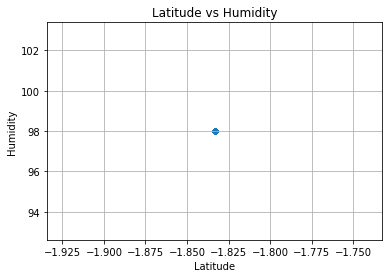

In [10]:
#Latitude vs. Humidity Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "Latitude vs Humidity").grid() 
plt.savefig("../Output/LatitudeVSHumidity.png")

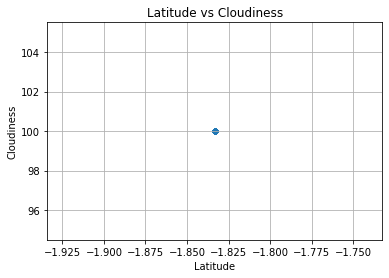

In [11]:
#Latitude vs. Cloudiness Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "Latitude vs Cloudiness").grid() 
plt.savefig("../Output/LatitudeVSCloudiness.png")

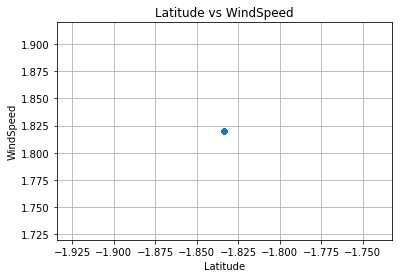

In [12]:
#Latitude vs. Wind Speed Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "WindSpeed", title = "Latitude vs WindSpeed").grid() 
plt.savefig("../Output/LatitudevsWindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression